## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (699, 699, 3) and mask shape: (699, 699)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


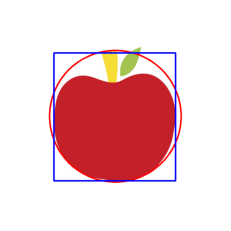

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Jeg sætter switch_channels til True for så får billedet sine rigtige farver. Hvis false ville det blive blåt.
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt


def create_apple_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    red_lower = (0, 100, 100) # hsv (0-360, 0-255, 0-255) sometimes written as (0-360, 100%, 100%)
    red_upper = (360, 255, 255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, red_lower, red_upper) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=2)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=2)            # erode: opposite of dilate. remove pixels from outer layer
    print(f'cv2.inRange(img,lower,higher){type(mask)} Image shape: {image.shape} and mask shape: {mask.shape}\n Image contains: {np.unique(image)}\n mask contains: {np.unique(mask)} which is good cause object to be found should be white and background should be black.')
    
    return mask
create_plot(create_apple_mask(img))


def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image


image_path = './data/red-apple.jpg'

img = read(image_path)
create_plot(img)
apple_mask = create_apple_mask(img)
apple_marked = mark_object(img, apple_mask)
apple_converted = cv2.cvtColor(apple_marked, cv2.COLOR_RGB2BGR)
cv2.imwrite("./data/red-apple-converted.jpg", apple_converted)

rectangle_img = img.copy()
cv2.rectangle(rectangle_img,(540,560),(150,150),(0,0,255),3) 
#((bredde-til-højre og højde-nedefra),(bredde-til-venstre og højde-top),(farve på firkant),tykkelse på firkant)
plt.imshow(rectangle_img)

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (315, 673, 3) and mask shape: (315, 673)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


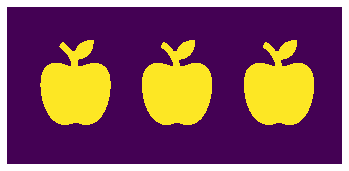

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt


def create_apple_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    red_lower = (0, 100, 100) # hsv (0-360, 0-255, 0-255) sometimes written as (0-360, 100%, 100%)
    red_upper = (360, 255, 255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, red_lower, red_upper) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=2)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=2)            # erode: opposite of dilate. remove pixels from outer layer
    print(f'cv2.inRange(img,lower,higher){type(mask)} Image shape: {image.shape} and mask shape: {mask.shape}\n Image contains: {np.unique(image)}\n mask contains: {np.unique(mask)} which is good cause object to be found should be white and background should be black.')
    
    return mask
create_plot(create_apple_mask(img))


def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

image_path = './data/3-apples.jpeg'

img = read(image_path)
#create_plot(img)

Image shape (315, 673, 3) Thresh (315, 673) [  0 254 255]
There are 3 apples


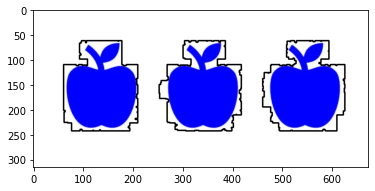

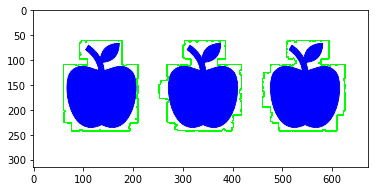

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./data/3-apples.jpeg', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')